# RNA-seq analysis with R

This notebook is guided by Chapters 1-6 of [R for Data Science](https://r4ds.had.co.nz/index.html), with a bioinformatics twist. 


### [Introduction](https://r4ds.had.co.nz/introduction.html#what-you-will-learn)

### [Prerequisites](https://r4ds.had.co.nz/introduction.html#prerequisites)
Disregard this section - after you login through UCI's JupyterHub, you are ready to go! If you want to continue using R after this summer, I recommend reading through it. 

### [Running R code](https://r4ds.had.co.nz/introduction.html#running-r-code)


## Load packages

In [2]:
library(tidyverse)

── Attaching packages ────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Import data into R

We have data from 2 patient-derived cell lines, Control and FSHD2, that were differentiated in culture. Bulk short-read RNA-seq was performed using polyA primers and Illumina sequencing. To quantify gene expression, reads were mapped using [kallisto](https://pachterlab.github.io/kallisto/about), and the resulting counts matrix was saved as a csv file. The metadata was constructed from the sample names and saved as a csv file.

A variable provides us with a way to store this data and manipulate it. The code below imports the data and assigns it to the`counts` variable, and imports the metadata and assigns it to the `meta` variable. The `=` and `<-` operators are interchangeable.

In [1]:
counts = read.csv("data/fshd.counts.matrix.csv")
meta <- read.csv("data/fshd.metadata.csv")

## Investigate data

The `head()` function is just like `head` in Linux, except it outputs the first 6 lines rather than 10. Like the command line arguments, most functions also have options. For example, output the first 10 rows with `head(counts, 10)`.

The `dim()` function outputs the dimensions of the data in rows by columns.

In [3]:
head(counts)
dim(counts)

,Gene_ID,Gene_Name,Control_78_Day_0_Rep3,Control_78_Day_0_Rep4,Control_78_Day_3_Rep1,Control_78_Day_3_Rep2,FSHD2_19_Day_0_Rep1,FSHD2_19_Day_0_Rep2,FSHD2_19_Day_3_Rep1,FSHD2_19_Day_3_Rep2
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000223972.5,DDX11L1,0,2,0,0,0,0,0,0
2,ENSG00000227232.5,WASH7P,6,20,6,13,9,6,0,14
3,ENSG00000278267.1,MIR6859-1,0,0,0,0,0,0,0,0
4,ENSG00000243485.5,MIR1302-2HG,0,0,0,0,0,0,0,0
5,ENSG00000284332.1,MIR1302-2,0,0,0,0,0,0,0,0
6,ENSG00000237613.2,FAM138A,0,0,1,0,3,0,0,4


[1] 59429    10

In [4]:
head(meta)
dim(meta)

,Sample,Patient,Day,Rep
,<chr>,<chr>,<int>,<chr>
1,Control_78_Day_0_Rep3,Control,0,Rep3
2,Control_78_Day_0_Rep4,Control,0,Rep4
3,Control_78_Day_3_Rep1,Control,3,Rep1
4,Control_78_Day_3_Rep2,Control,3,Rep2
5,FSHD2_19_Day_0_Rep1,FSHD2,0,Rep1
6,FSHD2_19_Day_0_Rep2,FSHD2,0,Rep2


[1] 8 4

### Questions
1. How many genes are detected?
2. How many samples are there?
3. What is the gene name in the 6th row?
4. How many columns are in the metadata?
5. What are the column names of the metadata?
6. Which days were the samples collected on?

## Manipulating data

Data.frame variables can be manipulated by functions like `head()`, but also directly using brackets `[]` and the dollar sign `$` for column names.
`:` operator indicates a sequence. `c()` function combines multiple values. 

In [5]:
meta[1,2] # 1st row, 2nd column
meta[1:3,1] # rows 1 to 3, 1st column
meta$Day # column named "Day"
c(1,3,4) # 
class(c(1,3,4))
meta[1:2,c(1,3,4)] # rows 1 to 2, columns 1, 3, and 4

[1] "Control"

[1] "Control_78_Day_0_Rep3" "Control_78_Day_0_Rep4" "Control_78_Day_3_Rep1"

[1] 0 0 3 3 0 0 3 3

[1] 1 3 4

[1] "numeric"

,Sample,Day,Rep
,<chr>,<int>,<chr>
1,Control_78_Day_0_Rep3,0,Rep3
2,Control_78_Day_0_Rep4,0,Rep4


## Data visualization

Let's start using `ggplot()` by visualizing gene expression between the first 2 samples. First, filter the data to just be the gene name and samples `Control_78_Day_0_Rep3` and `Control_78_Day_0_Rep4` (columns 1, 3, and 4).

In [6]:
counts_filt = counts[,c(1,3,4)]

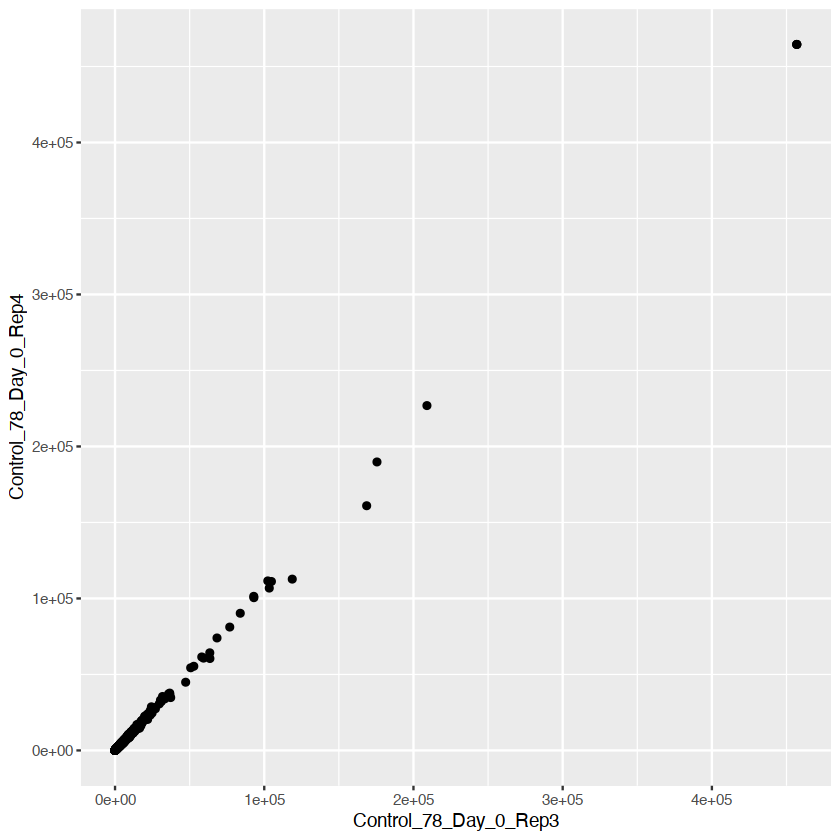

In [7]:
ggplot(data = counts_filt) + 
  geom_point(mapping = aes(x = Control_78_Day_0_Rep3, y = Control_78_Day_0_Rep4))

## Perform PCA analysis

[Excellent explanation of principal component analysis](https://www.youtube.com/watch?v=HMOI_lkzW08&t=1s)